In [1]:
import pandas as pd
from basilisk import Node, BN

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Simple Cases

### Define Complete Obvious Model

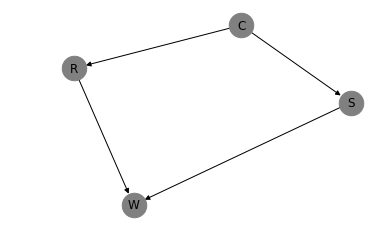

In [2]:
C = Node('C')
R = Node('R', [C])
S = Node('S', [C])
W = Node('W', [R, S])

nodesall = [C, R, S, W]

model = BN(nodesall)
model.show(node_size=600, node_color='gray')

In [3]:
model.dict_children

{'C': ['R', 'S'], 'R': ['W'], 'S': ['W'], 'W': []}

In [3]:
C.specify_cpt({'True': [0.5]})
R.specify_cpt({'C': [True, False],
               'True': [0.90, 0.1]})
S.specify_cpt({'C': [True, False],
               'True': [0.01, 0.99]})
W.specify_cpt({'R': [True, True, False, False], 
               'S': [True, False, True, False],
               'True':[1.0, 1.0, 1.0, 0.0]})
pass;

In [4]:
# generate batch samples
leaf = W
obs = model.generate_samples(leaf, n_samples=1000)
obs.head()

100%|██████████| 1000/1000 [00:09<00:00, 108.23it/s]


,C,S,R,W
0,True,False,True,True
1,True,False,True,True
2,True,False,False,False
3,True,False,True,True
4,True,False,True,True


In [16]:
model.ls_nodes[0].name
model.ls_nodes[1].name
model.ls_nodes[2].name
model.ls_nodes[3].name

'C'

'R'

'S'

'W'

In [25]:
model.ls_nodes[0].cpt
model.ls_nodes[1].cpt
model.ls_nodes[2].cpt
model.ls_nodes[3].cpt

,True,False
0,0.5,0.5


,C,True,False
0,True,0.9,0.1
1,False,0.1,0.9


,C,True,False
0,True,0.01,0.99
1,False,0.99,0.01


,R,S,True,False
0,True,True,1.0,0.0
1,True,False,1.0,0.0
2,False,True,1.0,0.0
3,False,False,0.0,1.0


In [18]:
obs.to_csv("data/obvyobs1.csv", index=None)

In [19]:
data = pd.read_csv("data/obvyobs1.csv")
data.head()

,C,S,R,W
0,True,False,True,True
1,True,False,True,True
2,True,False,False,False
3,True,False,True,True
4,True,False,True,True


In [75]:
testinds = pd.MultiIndex.from_product([['dvar'], ['True','False']])
testcols = pd.MultiIndex.from_product([[True,False], [True,False], [True,False]], 
                                      names = ['ivar1', 'ivar2', 'ivar3'])
pd.DataFrame(index=testinds, columns=testcols)

ivar1      True                    False                  
ivar2      True        False       True        False      
ivar3      True  False True  False True  False True  False
dvar True    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
     False   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

### Define Partial Model 1

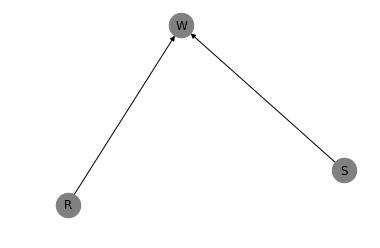

In [20]:
R1 = Node('R')
S1 = Node('S')
W1 = Node('W', [R1, S1])

nodes1 = [R1, S1, W1]
model1 = BN(nodes1)
data1 = data.drop(['C'], axis=1)

model1.show(node_size=600, node_color='gray')

In [40]:
data1.head()

,S,R,W
0,False,True,True
1,False,True,True
2,False,False,False
3,False,True,True
4,False,True,True


In [21]:
model1.fit(data1)
model1.ls_nodes[0].cpt
model1.ls_nodes[1].cpt
model1.ls_nodes[2].cpt

R,False,True
0,0.506,0.494


S,False,True
0,0.467,0.533


W,R,S,False,True
0,False,False,1.0,0.0
1,False,True,0.0,1.0
2,True,False,0.0,1.0
3,True,True,0.0,1.0


In [42]:
model1._calculate_cpt(W)

W,R,S,False,True
0,False,False,1.0,0.0
1,False,True,0.0,1.0
2,True,False,0.0,1.0
3,True,True,0.0,1.0


In [63]:
R1
model1.dict_nodes.values

<function dict.values>

In [60]:
R1 in model1.dict_nodes.values

TypeError: argument of type 'builtin_function_or_method' is not iterable

In [53]:
[model1.observations[x.name] for x in ]

,S,R,W
0,False,True,True
1,False,True,True
2,False,False,False
3,False,True,True
4,False,True,True
5,True,False,True
6,True,False,True
7,True,True,True
8,False,True,True
9,True,False,True


In [80]:
testparent = model1.ls_nodes[2].ls_parents

# subset its corresponding marginals
testps = [model1.observations[x.name] for x in testparent]
testcs = model1.observations[model1.ls_nodes[2].name]

# finally, crosstab
# # https://stackoverflow.com/questions/53510319/python-pandas-merging-with-more-than-one-level-overlap-on-a-multi-index-is-not
pd.crosstab(testps, testcs, normalize = 'index').reset_index()
pd.crosstab(testps, testcs, normalize = 'index')

W,R,S,False,True
0,False,False,1.0,0.0
1,False,True,0.0,1.0
2,True,False,0.0,1.0
3,True,True,0.0,1.0


W            False  True 
R     S                  
False False    1.0    0.0
      True     0.0    1.0
True  False    0.0    1.0
      True     0.0    1.0

In [72]:
testps

[0       True
 1       True
 2      False
 3       True
 4       True
 5      False
 6      False
 7       True
 8       True
 9      False
 10      True
 11     False
 12     False
 13      True
 14      True
 15     False
 16      True
 17     False
 18     False
 19     False
 20     False
 21      True
 22     False
 23     False
 24      True
 25      True
 26     False
 27     False
 28     False
 29      True
        ...  
 970    False
 971     True
 972     True
 973     True
 974    False
 975     True
 976    False
 977    False
 978     True
 979    False
 980     True
 981     True
 982     True
 983    False
 984    False
 985     True
 986     True
 987     True
 988     True
 989    False
 990    False
 991    False
 992     True
 993    False
 994     True
 995     True
 996    False
 997    False
 998     True
 999    False
 Name: R, Length: 1000, dtype: bool, 0      False
 1      False
 2      False
 3      False
 4      False
 5       True
 6       True
 7       Tru

In [73]:
testcs

0       True
1       True
2      False
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26     False
27      True
28      True
29      True
       ...  
970     True
971     True
972     True
973     True
974     True
975     True
976     True
977     True
978     True
979     True
980     True
981     True
982     True
983    False
984    False
985     True
986     True
987     True
988     True
989     True
990     True
991     True
992     True
993     True
994     True
995     True
996     True
997     True
998     True
999     True
Name: W, Length: 1000, dtype: bool

In [52]:
model1._calculate_cpt(R)

KeyError: 'C'

In [50]:
model1.ls_nodes

In [51]:
model1.ls_nodes[1].name
model1.ls_nodes[1].ls_parents

'S'

[]

### Define Partial Model 2

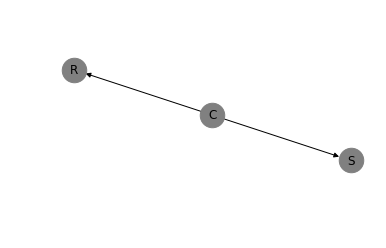

In [14]:
C2 = Node('C')
R2 = Node('R', [C2])
S2 = Node('S', [C2])

nodes2 = [C2, R2, S2]
model2 = BN(nodes2)
data2 = data.drop(['W'], axis=1)

model2.show(node_size=600, node_color='gray')

In [18]:
model2.fit(data2)
model2.ls_nodes[0].cpt
model2.ls_nodes[1].cpt
model2.ls_nodes[2].cpt

C,False,True
0,0.507,0.493


R,C,False,True
0,False,0.992110,0.007890
1,True,0.014199,0.985801


S,C,False,True
0,False,0.009862,0.990138
1,True,0.989858,0.010142


### Define Partial Model 3

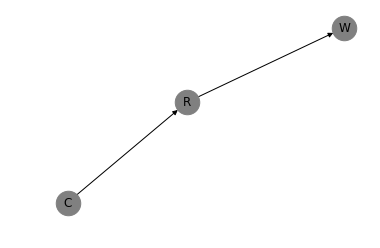

In [15]:
C3 = Node('C')
R3 = Node('R', [C3])
W3 = Node('W', [R3])

nodes3 = [C3, R3, W3]
model3 = BN(nodes3)
data3 = data.drop(['S'], axis=1)

model3.show(node_size=600, node_color='gray')

In [19]:
model3.fit(data3)
model3.ls_nodes[0].cpt
model3.ls_nodes[1].cpt
model3.ls_nodes[2].cpt

C,False,True
0,0.507,0.493


R,C,False,True
0,False,0.992110,0.007890
1,True,0.014199,0.985801


W,R,False,True
0,False,0.023529,0.976471
1,True,0.000000,1.000000


## PC Fresh

In [8]:
import copy
import itertools
import numpy as np
import pandas as pd
from scipy import stats

In [9]:
def mutual_info(data, bins):
    """
    inputs:
        data - first two columns are dependent variables and remaining are conditioned on
        bins - # of bins for each variable - determines resolution for pdf
        
    outputs:
        mutual or conditional mutual information depending on # columns
    """
    eps = 1e-10

    hist, edges = np.histogramdd(data, bins=bins)

    Pxyz = hist / data.shape[0] #P(X,Y,{Z})
    Pz = np.sum(Pxyz, axis = (0,1)) # P({Z})
    Pxz = np.sum(Pxyz, axis = 1) # P(X,{Z})
    Pyz = np.sum(Pxyz, axis = 0) # P(Y,{Z})
    
    dimtile = list(Pxyz.shape)
    dimtile[-len(Pz.shape):] = [1]*len(Pz.shape) if len(Pz.shape) > 0 else dimtile
    Pz = np.tile(Pz, tuple(dimtile))
    dimtile[-len(Pxz.shape):] = [1]*len(Pxz.shape)
    Pxz = np.swapaxes(np.tile(Pxz, tuple(dimtile)), 0, 1)
    Pyz = np.tile(Pyz, tuple(dimtile))
    
    lognum = Pxyz*Pz + eps
    logden = Pxz*Pyz + eps

    cmi = np.sum(Pxyz * np.log(lognum / logden))
    
    chi2 = 2*len(data)*cmi
    df = (bins[0] - 1)*(bins[1] - 1)*np.prod(bins[2:])
    p_val = 2*stats.chi2.pdf(chi2, df)
    
    return cmi, p_val

In [10]:
def dseperation(depvars, indvars, alpha):
    """
    d-separation test using mutual information
    inputs:
        depvars - data for two dependent variables as 2-column dataframe
        indvars - data for N independent variables as N-column dataframe
        alpha - pvalue threshold for dependence test

    output:
        boolean value dependent on alpha threshold

    issues:
        can only handle integer valued data
    """
    depbins = depvars.apply(pd.Series.nunique).values
    indbins = indvars.apply(pd.Series.nunique).values
    depdata = depvars.values.astype(int)
    inddata = indvars.values.astype(int)
    data = np.concatenate((depdata, inddata), axis = 1)
    bins = np.concatenate((depbins, indbins))

    assert len(depbins) == 2

    mi, p_val = mutual_info(data, bins)

    print("mi: ", np.around(mi, 4), "pval: ", p_val, \
          depvars.columns.values, indvars.columns.values)

    if p_val > alpha:
        return True
    else:
        return False

In [32]:
def pc_fresh(data, alpha):
    """
    path condition algorithm (spirtes 2nd ed 5.4.2)
    
    pseudo-code:
    
    1) initialize complete undirected "graph"
    2) perform d-sep test 
    
        n = 0
        repeat:
            for each x in graph:
                for each y in adj(x) s.t. |adj(x) \ y| >= n:
                    for each subset z in adj(x) \ y s.t. |z| = n:
                        if x and y are d-separated given z:
                            remove edge x-y from graph
                            record z in sepset(x,y) and sepset(y,x)
            n = n + 1
        until: |adj(x) \ y| < n for every pair x,y
        
    3) find collider nodes
    
        for each triplet x, y, z in graph:
            if x,y and y,z are adjacent but x,z is not adjacent:
                iff y is not in sepset(x,z):
                    orient x - y - z as x -> y <- z
    
    4) orient remaining edges
    
        repeat:
            if x -> y:
                for all z s.t. z is adjacent to y and z is not adjacent to x:
                    if there is no arrowhead at y:
                        orient y - z as y -> z
            if a directed path from x to y exists:
                if an edge exists between x and y:
                    orient x - y as x -> y
        until: no more edges to orient
    """
    
    labels = data.apply(pd.Series.nunique).index.values
    graph = dict([(x, [y for y in labels if x!=y]) for x in labels])
    sepset = dict([(x, []) for x in labels])
    print("initial graph: ", graph)
    n = 1
    stop = False
    while not stop:
        for x in labels: #loop through vertices x
            if len(graph[x]) - 1 >= n: #if |adj(x)| - 1 >= n
                for y in graph[x]: #loop through adj(x)
                    adj = copy.deepcopy(graph[x])
                    adj.remove(y) #define adj(x) \ y
                    for z in itertools.combinations(adj, n): #loop through adj(x) \ y
                        if dseperation(data[[x, y]], data[list(z)], alpha):
                            print("gottem: ", y, graph[x])
                            if y in graph[x]: #remove x-y edge
                                graph[x].remove(y)
                                graph[y].remove(x)
                            sepset[x] = {y:z} #add z to sepset(x,y)
                            sepset[y] = {x:z} #add z to sepset(y,x)
                    del adj #probably unecessary
        n += 1
        
        for x in labels:
            if len(graph[x]) > n - 1:
                stop = False
                break
            else:
                stop = True
    print("final undirected: ", graph)

    for x in graph.keys(): #orient edges
        for y in graph[x]:
            for z in graph[y]:
                if z != x and x not in graph[z] and z not in graph[x]:
                    if z in sepset[x] and y not in sepset[x][z]:
                        if y in graph[x]:
                            graph[y].remove(x)
                            
                        if y in graph[z]:
                            graph[y].remove(z)
                            
    nodelist = [Node(x) for x in graph.keys()]
    
    print("final directed: ", graph)
    
    for child in nodelist:
        parents = []

        for parent in nodelist:
            if child.name in graph.get(parent.name):
                parents.append(parent )
        child.ls_parents = parents
        
    return nodelist

initial graph:  {'cloudy': ['rain', 'sprinkler', 'wet'], 'rain': ['cloudy', 'sprinkler', 'wet'], 'sprinkler': ['cloudy', 'rain', 'wet'], 'wet': ['cloudy', 'rain', 'sprinkler']}
mi:  0.18 pval:  2.747850746448526e-80 ['cloudy' 'rain'] []
mi:  0.0988 pval:  6.943933513919783e-45 ['cloudy' 'sprinkler'] []
mi:  0.0192 pval:  5.84545098042687e-10 ['cloudy' 'wet'] []
mi:  0.18 pval:  2.747850746448526e-80 ['rain' 'cloudy'] []
mi:  0.0348 pval:  7.033812140570838e-17 ['rain' 'sprinkler'] []
mi:  0.1781 pval:  1.819678743455108e-79 ['rain' 'wet'] []
mi:  0.0988 pval:  6.943933513919783e-45 ['sprinkler' 'cloudy'] []
mi:  0.0348 pval:  7.033812140570838e-17 ['sprinkler' 'rain'] []
mi:  0.0767 pval:  3.1808570118053143e-35 ['sprinkler' 'wet'] []
mi:  0.0192 pval:  5.84545098042687e-10 ['wet' 'cloudy'] []
mi:  0.1781 pval:  1.8196787434553667e-79 ['wet' 'rain'] []
mi:  0.0767 pval:  3.1808570118053143e-35 ['wet' 'sprinkler'] []
mi:  0.1455 pval:  6.269252094322976e-64 ['cloudy' 'rain'] ['sprinkler

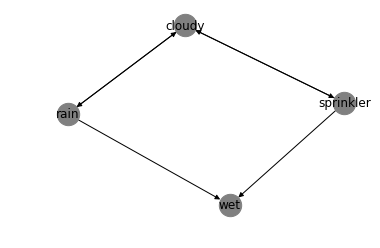

In [29]:
obs1 = pd.read_csv("data/observations.csv").drop('Unnamed: 0', axis = 1)

BN(pc_fresh(obs1, 1e-1)).show(node_size=500, node_color='gray')

initial graph:  {'rain': ['sprinkler', 'wet'], 'sprinkler': ['rain', 'wet'], 'wet': ['rain', 'sprinkler']}
mi:  0.0348 pval:  7.033812140570838e-17 ['rain' 'sprinkler'] []
gottem:  sprinkler ['sprinkler', 'wet']
mi:  0.0767 pval:  3.1808570118053143e-35 ['sprinkler' 'wet'] []
mi:  0.1781 pval:  1.8196787434553667e-79 ['wet' 'rain'] []
mi:  0.0767 pval:  3.1808570118053143e-35 ['wet' 'sprinkler'] []
mi:  0.3548 pval:  8.425035827860578e-155 ['wet' 'rain'] ['sprinkler']
mi:  0.2533 pval:  9.662969093153768e-111 ['wet' 'sprinkler'] ['rain']
final undirected:  {'rain': ['wet'], 'sprinkler': ['wet'], 'wet': ['rain', 'sprinkler']}
final directed:  {'rain': ['wet'], 'sprinkler': ['wet'], 'wet': []}


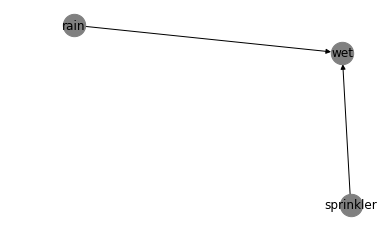

In [30]:
BN(pc_fresh(obs1.drop('cloudy', axis = 1), 1e-17)).show(node_size=500, node_color='gray')

initial graph:  {'cloudy': ['sprinkler', 'wet'], 'sprinkler': ['cloudy', 'wet'], 'wet': ['cloudy', 'sprinkler']}
mi:  0.1693 pval:  3.0312733801307896e-74 ['cloudy' 'sprinkler'] ['wet']
mi:  0.0897 pval:  1.1251309175458407e-39 ['cloudy' 'wet'] ['sprinkler']
mi:  0.1693 pval:  3.0312733801307032e-74 ['sprinkler' 'cloudy'] ['wet']
mi:  0.1472 pval:  1.2233106184624039e-64 ['sprinkler' 'wet'] ['cloudy']
mi:  0.0897 pval:  1.1251309175458407e-39 ['wet' 'cloudy'] ['sprinkler']
mi:  0.1472 pval:  1.2233106184623691e-64 ['wet' 'sprinkler'] ['cloudy']
final undirected:  {'cloudy': ['sprinkler', 'wet'], 'sprinkler': ['cloudy', 'wet'], 'wet': ['cloudy', 'sprinkler']}
final directed:  {'cloudy': ['sprinkler', 'wet'], 'sprinkler': ['cloudy', 'wet'], 'wet': ['cloudy', 'sprinkler']}


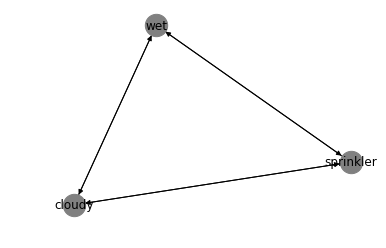

In [33]:
BN(pc_fresh(obs1.drop('rain', axis = 1), 1e-10)).show(node_size=500, node_color='gray')

initial graph:  {'cloudy': ['rain', 'wet'], 'rain': ['cloudy', 'wet'], 'wet': ['cloudy', 'rain']}
mi:  0.1852 pval:  3.7905395624600947e-81 ['cloudy' 'rain'] ['wet']
mi:  0.0244 pval:  2.6340362212902817e-11 ['cloudy' 'wet'] ['rain']
mi:  0.1852 pval:  3.7905395624600947e-81 ['rain' 'cloudy'] ['wet']
mi:  0.1833 pval:  2.496989812424042e-80 ['rain' 'wet'] ['cloudy']
mi:  0.0244 pval:  2.6340362212902817e-11 ['wet' 'cloudy'] ['rain']
mi:  0.1833 pval:  2.496989812424042e-80 ['wet' 'rain'] ['cloudy']
final undirected:  {'cloudy': ['rain', 'wet'], 'rain': ['cloudy', 'wet'], 'wet': ['cloudy', 'rain']}
final directed:  {'cloudy': ['rain', 'wet'], 'rain': ['cloudy', 'wet'], 'wet': ['cloudy', 'rain']}


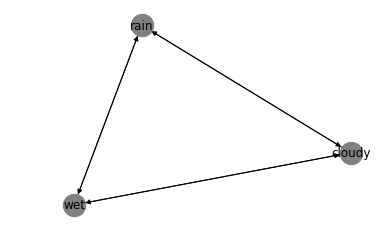

In [27]:
BN(pc_fresh(obs1.drop('sprinkler', axis = 1), 1e-1)).show(node_size=500, node_color='gray')

initial graph:  {'cloudy': ['rain', 'sprinkler'], 'rain': ['cloudy', 'sprinkler'], 'sprinkler': ['cloudy', 'rain']}
mi:  0.18 pval:  2.747850746448526e-80 ['cloudy' 'rain'] []
mi:  0.0988 pval:  6.943933513919783e-45 ['cloudy' 'sprinkler'] []
mi:  0.18 pval:  2.747850746448526e-80 ['rain' 'cloudy'] []
mi:  0.0348 pval:  7.033812140570838e-17 ['rain' 'sprinkler'] []
mi:  0.0988 pval:  6.943933513919783e-45 ['sprinkler' 'cloudy'] []
mi:  0.0348 pval:  7.033812140570838e-17 ['sprinkler' 'rain'] []
mi:  0.1455 pval:  6.269252094322976e-64 ['cloudy' 'rain'] ['sprinkler']
mi:  0.0643 pval:  1.173703964271977e-28 ['cloudy' 'sprinkler'] ['rain']
mi:  0.1455 pval:  6.269252094322976e-64 ['rain' 'cloudy'] ['sprinkler']
mi:  0.0003 pval:  0.706020072510996 ['rain' 'sprinkler'] ['cloudy']
gottem:  sprinkler ['cloudy', 'sprinkler']
final undirected:  {'cloudy': ['rain', 'sprinkler'], 'rain': ['cloudy'], 'sprinkler': ['cloudy']}
final directed:  {'cloudy': ['rain', 'sprinkler'], 'rain': ['cloudy'], 

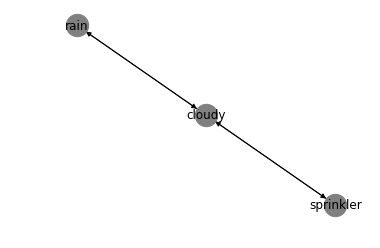

In [16]:
BN(pc_fresh(obs1.drop('wet', axis = 1), 1e-1)).show(node_size=500, node_color='gray')

initial graph:  {'rain': ['cloudy', 'sprinkler', 'wet'], 'cloudy': ['rain', 'sprinkler', 'wet'], 'sprinkler': ['rain', 'cloudy', 'wet'], 'wet': ['rain', 'cloudy', 'sprinkler']}
mi:  0.0 pval:  5.64945144353613 ['rain' 'cloudy'] []
gottem:  cloudy ['cloudy', 'sprinkler', 'wet']
mi:  0.001 pval:  0.2128344892471829 ['rain' 'wet'] []
gottem:  wet ['sprinkler', 'wet']
mi:  0.0134 pval:  2.301400042484311e-07 ['cloudy' 'sprinkler'] []
mi:  0.0021 pval:  0.05040132056241973 ['cloudy' 'wet'] []
mi:  0.0319 pval:  1.3328442949069318e-15 ['sprinkler' 'rain'] []
mi:  0.0134 pval:  2.301400042484311e-07 ['sprinkler' 'cloudy'] []
mi:  0.0281 pval:  6.888298656128168e-14 ['sprinkler' 'wet'] []
mi:  0.0021 pval:  0.05040132056241973 ['wet' 'cloudy'] []
mi:  0.0281 pval:  6.888298656128168e-14 ['wet' 'sprinkler'] []
mi:  0.0122 pval:  5.140344638860021e-06 ['cloudy' 'sprinkler'] ['wet']
mi:  0.0008 pval:  0.4406439848783395 ['cloudy' 'wet'] ['sprinkler']
gottem:  wet ['sprinkler', 'wet']
mi:  0.0432 

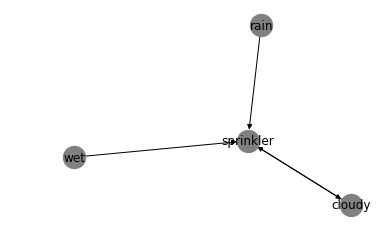

In [17]:
obs2 = pd.read_csv("data/obs_v2.csv")

BN(pc_fresh(obs2, 1e-1)).show(node_size=500, node_color='gray')

initial graph:  {'B': ['A', 'T', 'C', 'S', 'R', 'W'], 'A': ['B', 'T', 'C', 'S', 'R', 'W'], 'T': ['B', 'A', 'C', 'S', 'R', 'W'], 'C': ['B', 'A', 'T', 'S', 'R', 'W'], 'S': ['B', 'A', 'T', 'C', 'R', 'W'], 'R': ['B', 'A', 'T', 'C', 'S', 'W'], 'W': ['B', 'A', 'T', 'C', 'S', 'R']}
mi:  0.0254 pval:  1.0269694181757366e-12 ['B' 'A'] []
mi:  0.0 pval:  7.025849822641294 ['B' 'T'] []
gottem:  T ['A', 'T', 'C', 'S', 'R', 'W']
mi:  0.0001 pval:  1.5629304436004443 ['B' 'S'] []
gottem:  S ['A', 'C', 'S', 'R', 'W']
mi:  0.0 pval:  7.514460918498283 ['B' 'W'] []
gottem:  W ['A', 'C', 'R', 'W']
mi:  0.0254 pval:  1.0269694181757366e-12 ['A' 'B'] []
mi:  0.0 pval:  34.063164099650805 ['A' 'T'] []
gottem:  T ['B', 'T', 'C', 'S', 'R', 'W']
mi:  0.0058 pval:  0.0007198958676373381 ['A' 'S'] []
mi:  0.0008 pval:  0.2672952669478602 ['A' 'R'] []
gottem:  R ['B', 'C', 'S', 'R', 'W']
mi:  0.0001 pval:  1.9627988686255595 ['T' 'C'] []
gottem:  C ['C', 'S', 'R', 'W']
mi:  0.1401 pval:  6.628320133901707e-63 ['

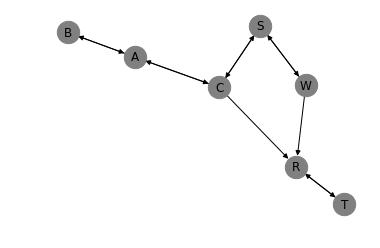

In [18]:
obs3 = pd.read_csv("data/obs_v3.csv")

BN(pc_fresh(obs3, 0.05)).show(node_size=500, node_color='gray')

## Scratch

In [19]:
testdata = obs1[['cloudy','wet']].values.astype(int)

eps = 1e-10
bins = [2,2]
hist, edges = np.histogramdd(testdata, bins=bins)

Pxyzz = hist / testdata.shape[0] #P(X,Y,Z)
Pzz = np.sum(Pxyzz, axis = (0,1)) # P(Z)
Pxzz = np.sum(Pxyzz, axis = 1) # P(X,Z)
Pyzz = np.sum(Pxyzz, axis = 0) # P(Y,Z)    

lognum = np.empty((Pxyzz.shape)) # P(Z)P(X,Y,Z)
logden = np.empty((Pxyzz.shape)) # P(X,Z)P(Y,Z)
for i in range(bins[0]):
    for j in range(bins[1]):
            lognum[i][j] = Pzz*Pxyzz[i][j]
            logden[i][j] = Pxzz[i]*Pyzz[j]

cmi = np.sum(Pxyzz * np.log((lognum + eps) / (logden + eps) ) )

chi2 = 2*len(testdata)*cmi
df = (2 - 1) * (2 - 1)

cmi
2*stats.chi2.pdf(chi2, df)

mutual_info(testdata, [2,2])

0.019210104042050195

5.84545098042687e-10

(0.019210104042050195, 5.84545098042687e-10)

In [20]:
testdata = np.concatenate((obs1[['cloudy','wet']],obs1[['rain']]),axis=1).astype(int)

eps = 1e-10
bins = [2,2,2]
hist, edges = np.histogramdd(testdata, bins=bins)

Pxyzz = hist / testdata.shape[0] #P(X,Y,Z)
Pzz = np.sum(Pxyzz, axis = (0,1)) # P(Z)
Pxzz = np.sum(Pxyzz, axis = 1) # P(X,Z)
Pyzz = np.sum(Pxyzz, axis = 0) # P(Y,Z)    

lognum = np.empty((Pxyzz.shape)) # P(Z)P(X,Y,Z)
logden = np.empty((Pxyzz.shape)) # P(X,Z)P(Y,Z)
for i in range(bins[0]):
    for j in range(bins[1]):
        for k in range(bins[2]):
            lognum[i][j][k] = Pzz[k]*Pxyzz[i][j][k]
            logden[i][j][k] = Pxzz[i][k]*Pyzz[j][k]

cmi = np.sum(Pxyzz * np.log((lognum + eps) / (logden + eps) ) )

chi2 = 2*len(testdata)*cmi
df = (2 - 1) * (2 - 1) * 2

cmi
2*stats.chi2.pdf(chi2, df)

mutual_info(testdata, [2,2,2])

0.024359918668268983

2.6340362212902817e-11

(0.024359918668268983, 2.6340362212902817e-11)

In [21]:
testdata = np.concatenate((obs1[['cloudy','wet']],obs1[['rain','sprinkler']]),axis=1).astype(int)

eps = 1e-10
bins = [2,2,2,2]
hist, edges = np.histogramdd(testdata, bins=bins)

Pxyzz = hist / testdata.shape[0] #P(X,Y,ZZ)
Pzz = np.sum(Pxyzz, axis = (0,1)) # P(Z)
Pxzz = np.sum(Pxyzz, axis = 1) # P(X,Z)
Pyzz = np.sum(Pxyzz, axis = 0) # P(Y,Z)    

lognum = np.empty((Pxyzz.shape)) # P(Z)P(X,Y,Z)
logden = np.empty((Pxyzz.shape)) # P(X,Z)P(Y,Z)
for i in range(bins[0]):
    for j in range(bins[1]):
        for k in range(bins[2]):
            for l in range(bins[3]):
                lognum[i][j][k][l] = Pxyzz[i][j][k][l]*Pzz[k][l]
                logden[i][j][k][l] = Pxzz[i][k][l]*Pyzz[j][k][l]
                
#                 lognum[i][j][:] = Pxyzz[i][j][k][l]*Pzz[:]
#                 logden[i][j][:] = Pxzz[i][k][l]*Pyzz[j][:]

cmi = np.sum(Pxyzz * np.log((lognum + eps) / (logden + eps) ) )

chi2 = 2*len(testdata)*cmi
df = (2 - 1) * (2 - 1) * 2*2

cmi
2*stats.chi2.pdf(chi2, df)

mutual_info(testdata, [2,2,2,2])

0.0015016159566173725

0.3345148104626348

(0.0015016159566173725, 0.3345148104626348)